<a href="https://colab.research.google.com/github/2303a52299/explainable-AI/blob/main/Exp_Lab_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2303A52299 B-45


Dataset shape: (2930, 82)
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condi

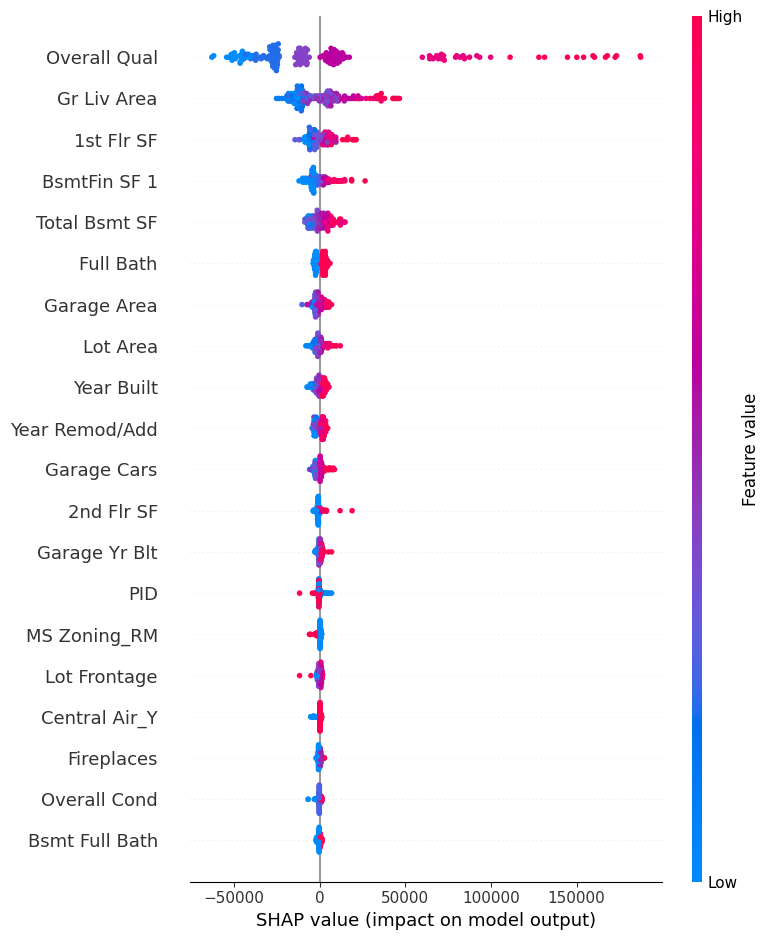

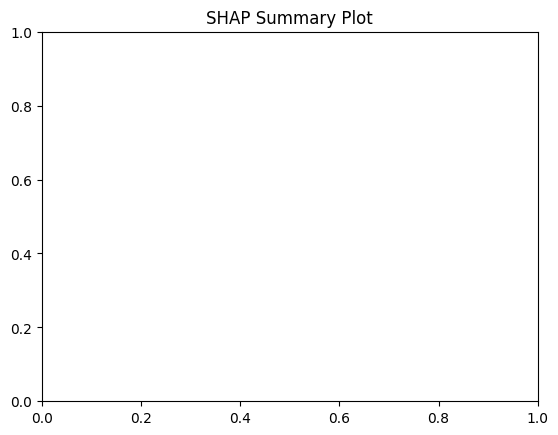

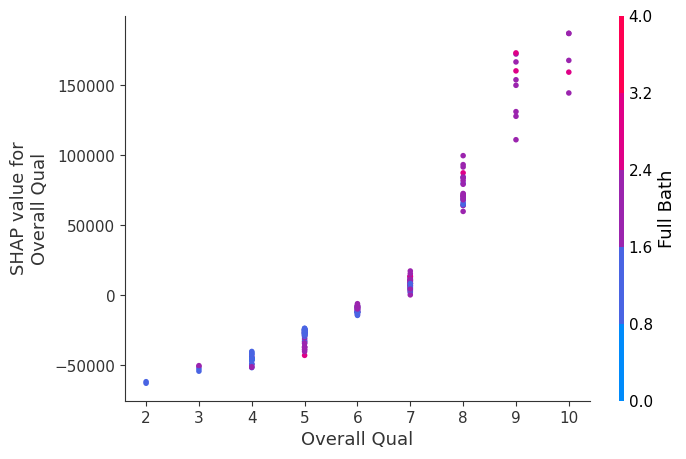

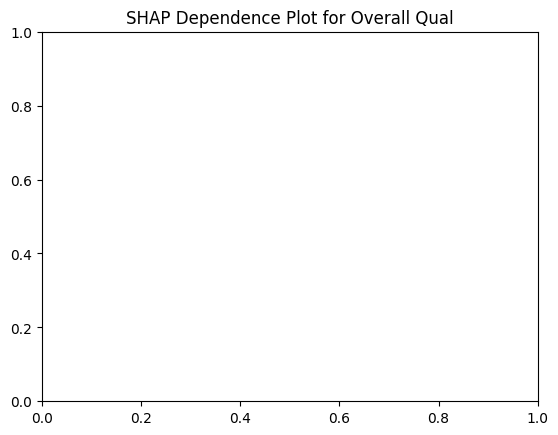

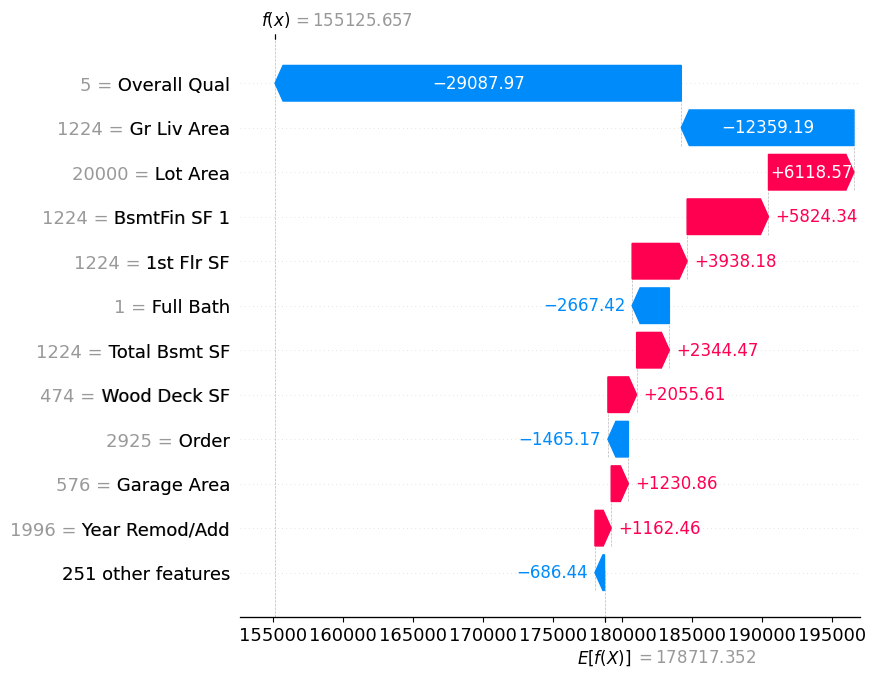

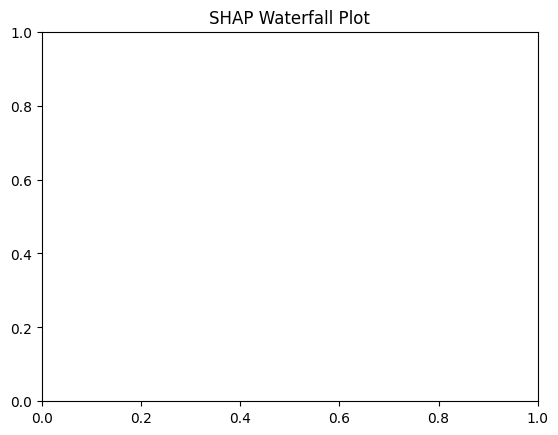


Top 10 features by model importance:
Overall Qual     0.606214
Gr Liv Area      0.098343
1st Flr SF       0.038474
Total Bsmt SF    0.025796
BsmtFin SF 1     0.022899
2nd Flr SF       0.022159
Full Bath        0.017676
Garage Cars      0.017036
Garage Area      0.015373
Lot Area         0.015298
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# 1. Load Dataset
# -----------------------------
df = pd.read_csv("AmesHousing.csv")
print("Dataset shape:", df.shape)
print(df.head())

# -----------------------------
# 2. Features & Target
# -----------------------------
target = "SalePrice"
X = df.drop(columns=[target])
y = df[target]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)
print("Final features shape:", X.shape)

# -----------------------------
# 3. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 4. Model Training
# -----------------------------
model = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# -----------------------------
# 5. Model Performance
# -----------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.3f}")

# -----------------------------
# 6. SHAP Analysis
# -----------------------------
explainer = shap.TreeExplainer(model)
X_sample = X_test.sample(n=200, random_state=42)
shap_values = explainer.shap_values(X_sample)

# Summary Plot
shap.summary_plot(shap_values, X_sample)
plt.title("SHAP Summary Plot")
plt.show()

# Dependence Plot (for most important feature)
top_feature = X.columns[np.argsort(np.abs(shap_values).mean(axis=0))[::-1][0]]
shap.dependence_plot(top_feature, shap_values, X_sample)
plt.title(f"SHAP Dependence Plot for {top_feature}")
plt.show()

# Waterfall Plot (single prediction)
i = 0
exp = shap.Explanation(
    values=shap_values[i],
    base_values=explainer.expected_value,
    data=X_sample.iloc[i, :].values,
    feature_names=X_sample.columns.tolist()
)
shap.plots.waterfall(exp, max_display=12)
plt.title("SHAP Waterfall Plot")
plt.show()

# -----------------------------
# 7. Compare with Model Feature Importance
# -----------------------------
importances = pd.Series(model.feature_importances_, index=X.columns)
print("\nTop 10 features by model importance:")
print(importances.sort_values(ascending=False).head(10))
